# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('entamoeba_canonicalSmiles.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL601348,CCCCCCOC(=O)C1=C(C)NC(=O)NC1c1ccccc1F,inactive,334.391,3.57710,2.0,3.0,4.522879
1,CHEMBL137,Cc1ncc([N+](=O)[O-])n1CCO,active,171.156,0.09202,1.0,5.0,6.698970
2,CHEMBL4240382,O=[N+]([O-])c1cnc(/C=C/c2ccc(F)cc2)n1CCn1cc(CO...,active,434.431,3.97150,0.0,8.0,6.552842
3,CHEMBL207803,NC(=S)N1CCC(c2ccccc2)=N1,inactive,205.286,1.34000,1.0,2.0,4.764472
4,CHEMBL870,NCCCC(O)(P(=O)(O)O)P(=O)(O)O,inactive,249.096,-1.27320,6.0,4.0,3.698970
...,...,...,...,...,...,...,...,...
778,CHEMBL581175,CCn1c(CN2CCN(Cc3ccccc3)CC2)nc2cc(NC(=O)c3cccs3...,inactive,459.619,4.68780,1.0,6.0,4.522879
779,CHEMBL531290,CCC(c1ccccc1)c1nn2c(-c3cccs3)nnc2s1,inactive,326.450,4.45620,0.0,6.0,4.522879
780,CHEMBL1545915,COc1ccc2c(c1)C1(Nc3ccccc3-c3nc4ccccc4n31)C(=O)N2,inactive,368.396,3.79060,2.0,5.0,4.522879
781,CHEMBL534283,CCCCNc1nc(NC(C)(C)C)nc(NC(C)(C)C)n1,inactive,294.447,3.50440,3.0,6.0,4.522879


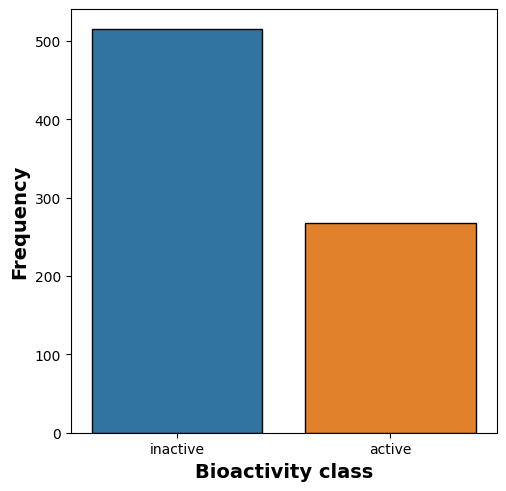

In [3]:
# Check active and inactive bioactivity class
plt.figure(figsize= (5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# plt.savefig('plot_bioactivity_class.pdf')
plt.show()

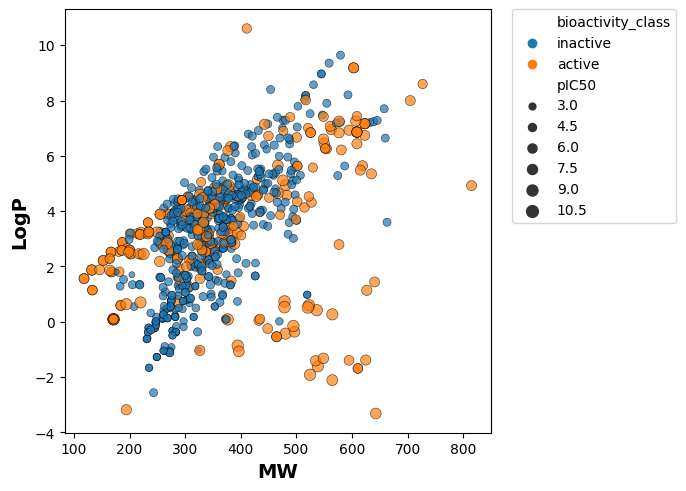

In [4]:
# bioactivity class spead
plt.figure(figsize= (5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data= df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

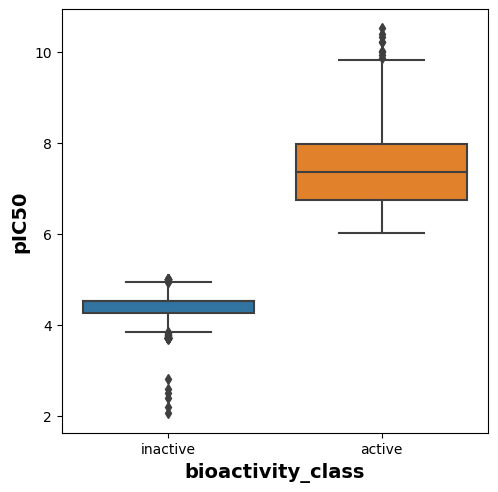

In [5]:
plt.figure(figsize= (5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data= df)

plt.xlabel('bioactivity_class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

plt.show()

## Statistical analysis | Mann-Whitney U Test

In [10]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df_used = df[selection]
  active = df_used[df_used.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df_used = df[selection]
  inactive = df_used[df_used.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
#   results.to_csv(filename)

  return results

In [11]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,138020.0,1.488245e-121,0.05,Different distribution (reject H0)


Text(0, 0.5, 'MW')

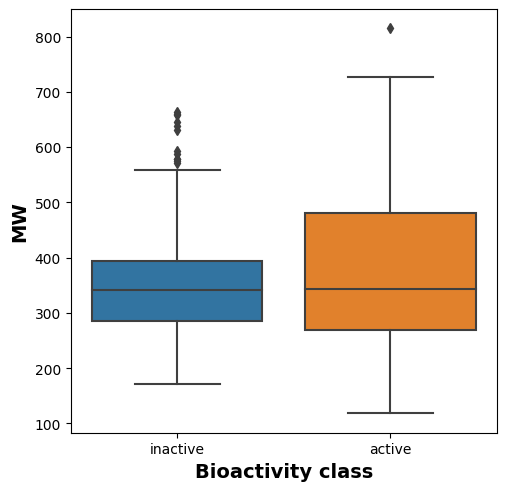

In [13]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

# plt.savefig('plot_MW.pdf')

In [14]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,72686.5,0.220892,0.05,Same distribution (fail to reject H0)


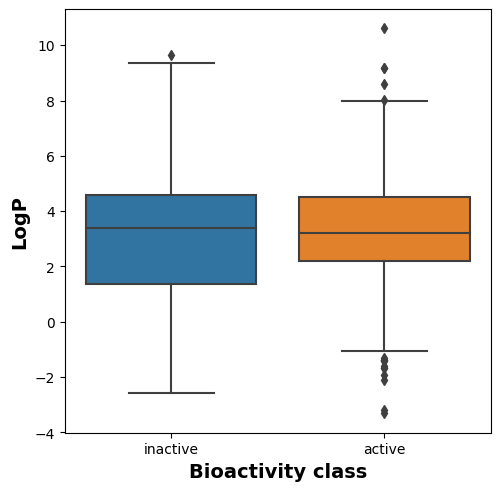

In [15]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

# plt.savefig('plot_LogP.pdf')

In [16]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,71482.0,0.410483,0.05,Same distribution (fail to reject H0)


Text(0, 0.5, 'NumHDonors')

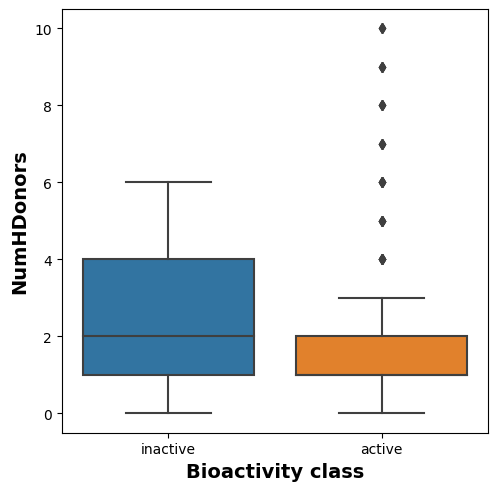

In [17]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

# plt.savefig('plot_NumHDonors.pdf')

In [18]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,57402.5,0.000066,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHAcceptors')

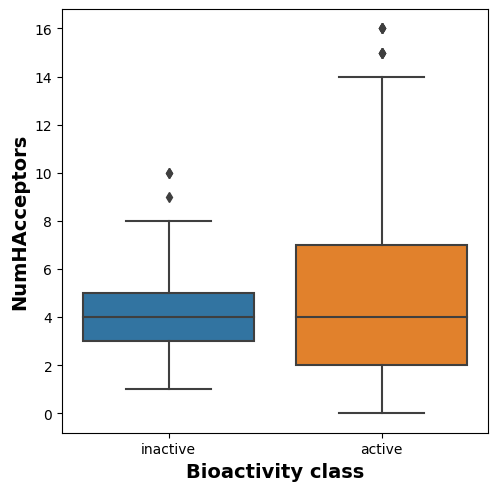

In [19]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

# plt.savefig('plot_NumHAcceptors.pdf')

In [20]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,71406.5,0.418606,0.05,Same distribution (fail to reject H0)


### Box Plots

**pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed *statistically significant difference*, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited *no difference* between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows *statistically significant difference* between actives and inactives.